# 당뇨병 분류 문제 ( 딥러닝 )

## import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

## 데이터 전처리 및 스케일링

In [6]:
# 데이터 불러오기
df = pd.read_csv("https://github.com/MyungKyuYi/AI-class/raw/main/diabetes.csv")
print(df.head())
print("\n=====================================================\n")

# 결측치 확인
print(df.isnull().sum())
print("\n=====================================================\n")

# 레이블 불균형 여부를 위한 갯수 확인 (숫자)
print(df['Outcome'].value_counts())
print("\n=====================================================\n")

X = df.drop(['Outcome'], axis=1) # Feature
Y = df['Outcome'] # 예측해야 할 컬럼

# One-Hot Encoding하면서 Numpy으로 변환
X = X.values # 문자열 데이터 없으므로 바로 numpy 변환
Y = pd.get_dummies(Y).values # label은 숫자 데이터여도 연관성을 끊어줘야 하기 때문에 반드시 인코딩.
print(X)
print(Y)

# 학습 데이터 & 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=15)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 분할된 데이터의 shape을 출력
print("\n=====================================================\n")
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("Y_train.shape : ", Y_train.shape)
print("Y_test.shape : ", Y_test.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Outcome
0    500

## 딥러닝 학습 및 예측

In [9]:
# 딥러닝
model = Sequential()

model.add(Dense(20,input_shape=(8,),activation='relu')) # 입력층 : 특성의 개수 8
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(2,activation='sigmoid')) # 출력층 : 이진 분류이므로 뉴런 개수 2, 활성화 함수 sigmoid, loss function은 binary_crossentropy

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

model.summary() # 모델 구조 출력


model_history=model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_split=0.1) # validation_data = (X_test, Y_test)으로 하면 안됨.
# 테스트 데이터는 테스트할 때만 사용해야 됨. 따라서 훈련 데이터의 10%를 검증 데이터로 사용.
Y_pred = model.predict(X_test) # 예측. 각 클래스에 대한 확률 값을 예측한다.

C:\Users\plo55\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,062 (4.15 KB)

 Trainable params: 1,062 (4.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7133 - loss: 0.6840 - val_accuracy: 0.6667 - val_loss: 0.6740
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7474 - loss: 0.6498 - val_accuracy: 0.6852 - val_loss: 0.6446
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7667 - loss: 0.6183 - val_accuracy: 0.6852 - val_loss: 0.6179
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7500 - loss: 0.5874 - val_accuracy: 0.7037 - val_loss: 0.5876
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7831 - loss: 0.5369 - val_accuracy: 0.7222 - val_loss: 0.5557
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8059 - loss: 0.4996 - val_accuracy: 0.7222 - val_loss: 0.5339
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7700 - loss: 0.4798 - val_accuracy: 0.7593 - val_loss: 0.5197
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7543 - loss: 0.4885 - val_accuracy: 0.7037 - val_loss

## 딥러닝 성능 평가

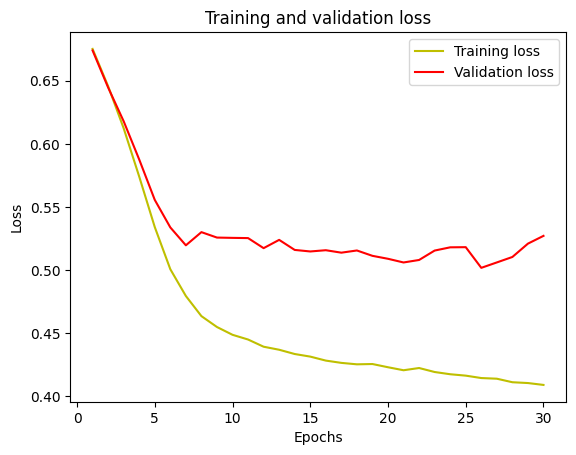

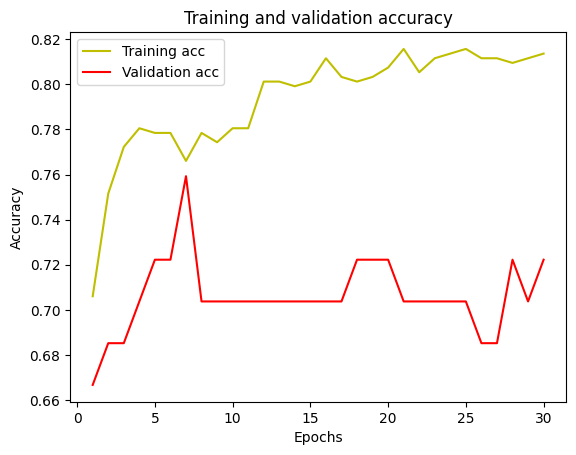



              precision    recall  f1-score   support

           0       0.80      0.84      0.82       160
           1       0.59      0.54      0.56        71

    accuracy                           0.74       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.74      0.74      0.74       231



[[134  26]
 [ 33  38]]


In [12]:
# 분류 문제에서 one-hot 인코딩된 데이터를 성능 평가에 쓰기 위해 다시 정수 라벨로 바꾸는 코드.
Y_test_class = np.argmax(Y_test,axis=1) # 실제 정답 클래스(정수 형태) ex) [0, 0, 1, 0] → 클래스 2 / [1, 0, 0, 0] → 클래스 0
Y_pred_class = np.argmax(Y_pred,axis=1) # 모델이 예측한 클래스(정수 형태) ex) [0.01, 0.02, 0.97] → 예측한 클래스: 2 / [0.8, 0.1, 0.1] → 예측한 클래스: 0 가장 확률이 높은 클래스의 인덱스로 변환.

# 에폭마다 훈련 손실과 검증 손실이 어떻게 달라지는지 시각화
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 에폭마다 훈련 정확도와 검증 정확도가 어떻게 달라지는지 시각화
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# 모델 성능 평가
print("\n=====================================================\n")
print(classification_report(Y_test_class, Y_pred_class))
print("\n=====================================================\n")
print(confusion_matrix(Y_test_class, Y_pred_class))